Rule: [8] Cost: 0.48
Rule: [8, 2] Cost: 0.74
Rule: [8, 2, 4] Cost: 0.87
Rule: [8, 2, 4, 5] Cost: 0.95
Rule: [8, 2, 4, 5, 6] Cost: 0.98
Rule: [8, 2, 4, 5, 6, 9] Cost: 0.99
Rule: [8, 2, 4, 5, 6, 9, 3] Cost: 1.0
Rule: [8, 2, 4, 5, 6, 9, 3, 1] Cost: 1.0
Rule: [8, 2, 4, 5, 6, 9, 3, 1, 7] Cost: 1.0
Rule: [8, 2, 4, 5, 6, 9, 3, 1, 7, 0] Cost: 1.0
Rule: [8] Cost: 0.48
Rule: [8, 7] Cost: 0.75
Rule: [8, 7, 4] Cost: 0.87
Rule: [8, 7, 4, 1] Cost: 0.94
Rule: [8, 7, 4, 1, 6] Cost: 0.97
Rule: [8, 7, 4, 1, 6, 3] Cost: 0.99
Rule: [8, 7, 4, 1, 6, 3, 9] Cost: 1.0
Rule: [8, 7, 4, 1, 6, 3, 9, 2] Cost: 1.0
Rule: [8, 7, 4, 1, 6, 3, 9, 2, 5] Cost: 1.0
Rule: [8, 7, 4, 1, 6, 3, 9, 2, 5, 0] Cost: 1.0
Rule: [5] Cost: 0.48
Rule: [5, 2] Cost: 0.69
Rule: [5, 2, 4] Cost: 0.85
Rule: [5, 2, 4, 1] Cost: 0.9299999999999999
Rule: [5, 2, 4, 1, 6] Cost: 0.99
Rule: [5, 2, 4, 1, 6, 7] Cost: 1.0
Rule: [5, 2, 4, 1, 6, 7, 3] Cost: 1.0
Rule: [5, 2, 4, 1, 6, 7, 3, 8] Cost: 1.0
Rule: [5, 2, 4, 1, 6, 7, 3, 8, 9] Cost: 1.0
Rule: [5, 2

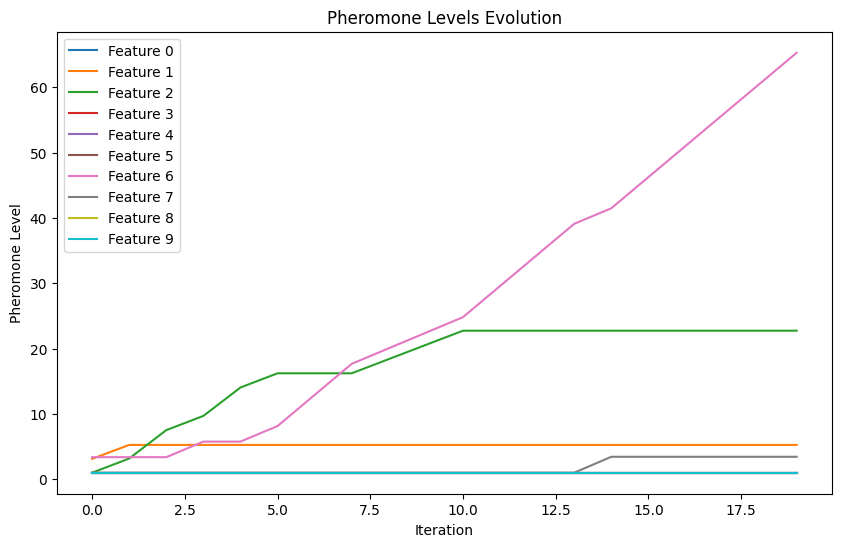

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class AntColony:
    def __init__(self, data, n_ants, n_best, n_iterations, decay, alpha=1, beta=2):
        self.pheromone = np.ones(data.shape[1])
        self.all_inds = range(data.shape[1])
        self.all_data = data
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

    def run(self):
        all_rules = []
        pheromone_history = []

        for i in range(self.n_iterations):
            rules = self.gen_all_rules()
            self.spread_pheromone(rules, self.n_best, self.decay)
            pheromone_history.append(np.copy(self.pheromone))  # Record pheromone levels
            all_rules.extend(rules)

        return all_rules, pheromone_history

    def spread_pheromone(self, rules, n_best, decay):
        sorted_rules = sorted(rules, key=lambda x: x[1])
        for rule, cost in sorted_rules[:n_best]:
            for feature in rule:
                self.pheromone[feature] += 1.0 / cost

    def gen_all_rules(self):
        all_rules = []
        for i in range(self.n_ants):
            rules = self.gen_rule()
            all_rules.extend(rules)
        return all_rules

    def gen_rule(self):
        rules = []
        rule = []
        visited_features = set()
        for i in range(self.all_data.shape[1]):
            next_feature = self.pick_next_feature(
                self.pheromone, self.all_data, rule, visited_features
            )
            rule.append(next_feature)
            visited_features.add(next_feature)
            rules.append((rule[:], self.evaluate(rule, self.all_data)))
        return rules

    def pick_next_feature(self, pheromone, data, rule, visited_features):
        all_features = list(set(self.all_inds) - visited_features)
        heuristic = np.zeros(len(all_features))
        for i, feature in enumerate(all_features):
            rule.append(feature)
            heuristic[i] = self.evaluate(rule, data)
            rule.remove(feature)
        probs = (pheromone[all_features] ** self.alpha) * (heuristic ** self.beta)
        probs /= np.sum(probs)
        selected_feature = np_choice(all_features, probs)
        return selected_feature

    def evaluate(self, rule, data):
        # Evaluation can be based on different metrics, such as confidence or support
        # For simplicity, let's consider support in this example
        support = np.sum(np.all(data[:, rule], axis=1)) / data.shape[0]
        return 1 - support

def np_choice(a, p):
    # Custom numpy choice function to handle NumPy versions
    return np.random.choice(a, p=p)

# Example Usage:
# Generate a random binary dataset for demonstration
data = np.random.randint(2, size=(100, 10))

# Initialize and run Ant Colony Optimization
ant_colony = AntColony(data, n_ants=5, n_best=2, n_iterations=20, decay=0.1)
all_rules, pheromone_history = ant_colony.run()

# Display the discovered association rules
for rule, cost in all_rules:
    print("Rule:", rule, "Cost:", cost)

# Visualize Pheromone Levels
plt.figure(figsize=(10, 6))
for i in range(ant_colony.pheromone.shape[0]):
    plt.plot(np.arange(ant_colony.n_iterations), [ph[i] for ph in pheromone_history], label=f'Feature {i}')

plt.xlabel('Iteration')
plt.ylabel('Pheromone Level')
plt.title('Pheromone Levels Evolution')
plt.legend()
plt.show()
